In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import scipy.constants as sc
from scipy.signal import periodogram
from scipy.optimize import curve_fit
from numba import *
import functions as f
import os

# Extract visibility data and average it into five bins.

In [2]:
band3 = np.loadtxt('band3.data')
visdata = f.extract_each_base_vis(band3)
binned_data = f.avg_data_ebin_comp(visdata,5)
avgvis = binned_data[1]

# Make some plots of the visibility baseline distribution.

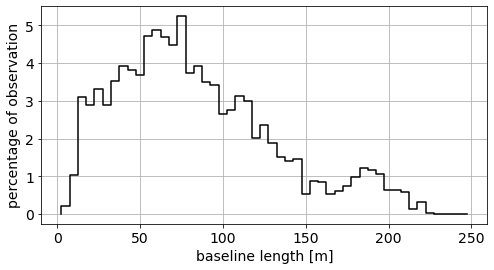

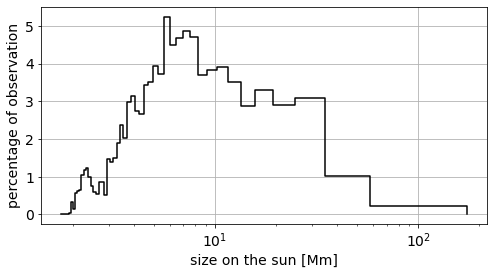

In [3]:
# Produce the labels of baseline length.
base_labels = []
for ii in range(0, len(binned_data[0])):
    temp = f.base_phys(binned_data[0][ii]/1000., 100, 149.6*(10**6))
    base_labels.append('Periodicity on the scale of: '+str(temp)[0:5]+' Mm')
    
# Plots of baseline Coverage.
mpl.rcParams['figure.figsize'] = (8,4)
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# In baseline length in meters.
hists = np.histogram(band3[:,1], bins=50, range=(0,250))
baseline_bins = np.arange(2.5,250,5)
plt.step(baseline_bins, (hists[0]/np.sum(hists[0]))*100, 'k', markersize=8)
plt.xlabel('baseline length [m]')
plt.ylabel('percentage of observation')
plt.grid()
plt.savefig('plots/baseline_dist_m.png')
plt.show()

# In baseline length in physical solar units.
baseline_bins_phys = f.base_phys(baseline_bins/1000., 100, 149.6*(10**6))
plt.step(baseline_bins_phys, (hists[0]/np.sum(hists[0]))*100, 'k', markersize=8)
plt.xlabel('size on the sun [Mm]')
plt.ylabel('percentage of observation')
plt.grid()
plt.savefig('plots/baseline_dist_sun_m.png')
plt.xscale('log')
plt.show()


# Plot the time series for the five bins.

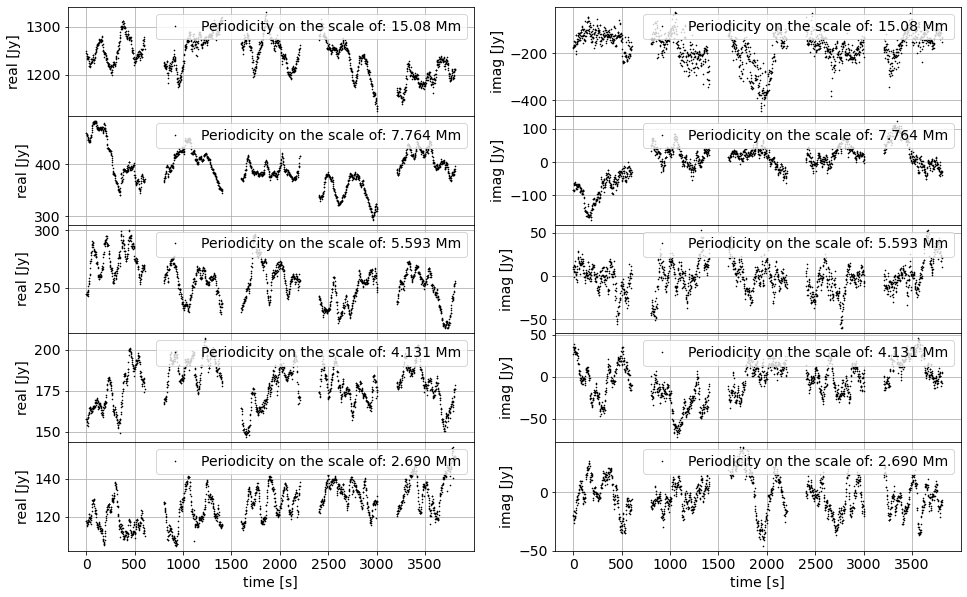

In [4]:
mpl.rcParams['figure.figsize'] = (16,10)
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(5, 2, sharex='col')

ax[0,0].plot(avgvis[0,:,0],avgvis[0,:,2],'kx',label=base_labels[0],markersize=1)
ax[0,0].grid()
ax[0,0].set_ylabel('real [Jy]')
ax[0,0].legend(loc='upper right')

ax[1,0].plot(avgvis[1,:,0],avgvis[1,:,2],'kx',label=base_labels[1],markersize=1)
ax[1,0].grid()
ax[1,0].set_ylabel('real [Jy]')
ax[1,0].legend(loc='upper right')

ax[2,0].plot(avgvis[2,:,0],avgvis[2,:,2],'kx',label=base_labels[2],markersize=1)
ax[2,0].grid()
ax[2,0].set_ylabel('real [Jy]')
ax[2,0].legend(loc='upper right')

ax[3,0].plot(avgvis[3,:,0],avgvis[3,:,2],'kx',label=base_labels[3],markersize=1)
ax[3,0].grid()
ax[3,0].set_ylabel('real [Jy]')
ax[3,0].legend(loc='upper right')

ax[4,0].plot(avgvis[4,:,0],avgvis[4,:,2],'kx',label=base_labels[4],markersize=1)
ax[4,0].grid()
ax[4,0].set_ylabel('real [Jy]')
ax[4,0].set_xlabel('time [s]')
ax[4,0].legend(loc='upper right')

ax[0,1].plot(avgvis[0,:,0],avgvis[0,:,3],'kx',label=base_labels[0],markersize=1)
ax[0,1].grid()
ax[0,1].set_ylabel('imag [Jy]')
ax[0,1].legend(loc='upper right')

ax[1,1].plot(avgvis[1,:,0],avgvis[1,:,3],'kx',label=base_labels[1],markersize=1)
ax[1,1].grid()
ax[1,1].set_ylabel('imag [Jy]')
ax[1,1].legend(loc='upper right')

ax[2,1].plot(avgvis[2,:,0],avgvis[2,:,3],'kx',label=base_labels[2],markersize=1)
ax[2,1].grid()
ax[2,1].set_ylabel('imag [Jy]')
ax[2,1].legend(loc='upper right')

ax[3,1].plot(avgvis[3,:,0],avgvis[3,:,3],'kx',label=base_labels[3],markersize=1)
ax[3,1].grid()
ax[3,1].set_ylabel('imag [Jy]')
ax[3,1].legend(loc='upper right')

ax[4,1].plot(avgvis[4,:,0],avgvis[4,:,3],'kx',label=base_labels[4],markersize=1)
ax[4,1].grid()
ax[4,1].set_ylabel('imag [Jy]')
ax[4,1].set_xlabel('time [s]')
ax[4,1].legend(loc='upper right')

plt.savefig('plots/band3_ts.png')
plt.subplots_adjust(hspace=0)
plt.show()

# Do the Lomb-Scargle Periodogram calculation.

In [5]:
fq = np.linspace(0.0005,0.25,5000)

bin1_power = f.LS_avg_vis(avgvis, 0, fq)
bin2_power = f.LS_avg_vis(avgvis, 1, fq)
bin3_power = f.LS_avg_vis(avgvis, 2, fq)
bin4_power = f.LS_avg_vis(avgvis, 3, fq)
bin5_power = f.LS_avg_vis(avgvis, 4, fq)

# Plot the LS results.

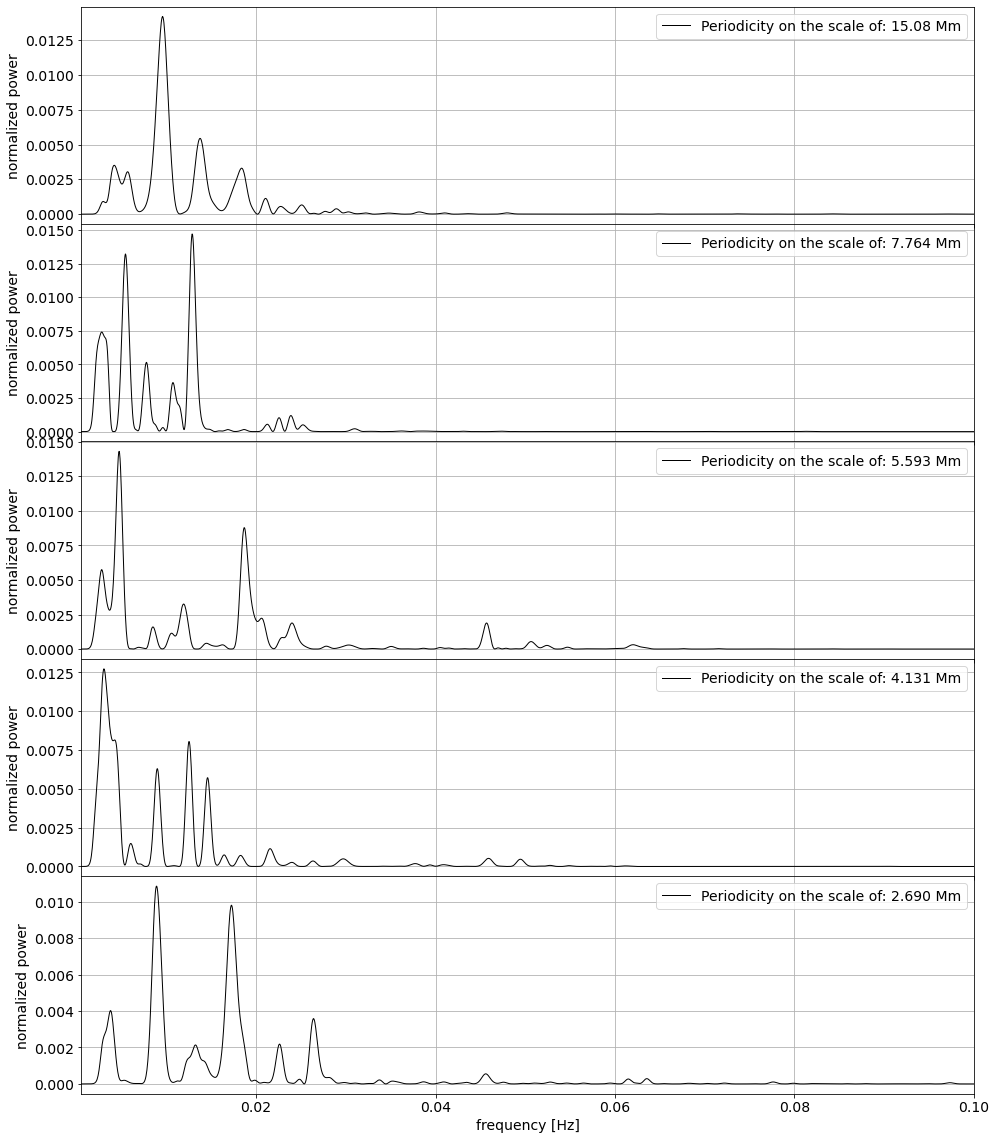

In [6]:
mpl.rcParams['figure.figsize'] = (16,20)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(5, 1, sharex='col')

ax[0].plot(fq,bin1_power/np.sum(bin1_power),'k-',lw=1,label=base_labels[0])
ax[0].set_xlim(0.0005,0.1)
ax[0].grid()
ax[0].set_ylabel('normalized power')
ax[0].legend(loc='upper right')

ax[1].plot(fq,bin2_power/np.sum(bin2_power),'k-',lw=1,label=base_labels[1])
ax[1].set_xlim(0.0005,0.1)
ax[1].grid()
ax[1].set_ylabel('normalized power')
ax[1].legend(loc='upper right')

ax[2].plot(fq,bin3_power/np.sum(bin3_power),'k-',lw=1,label=base_labels[2])
ax[2].set_xlim(0.0005,0.1)
ax[2].grid()
ax[2].set_ylabel('normalized power')
ax[2].legend(loc='upper right')

ax[3].plot(fq,bin4_power/np.sum(bin4_power),'k-',lw=1,label=base_labels[3])
ax[3].set_xlim(0.0005,0.1)
ax[3].grid()
ax[3].set_ylabel('normalized power')
ax[3].legend(loc='upper right')

ax[4].plot(fq,bin5_power/np.sum(bin5_power),'k-',lw=1,label=base_labels[4])
ax[4].set_xlim(0.0005,0.1)
ax[4].grid()
ax[4].set_ylabel('normalized power')
ax[4].set_xlabel('frequency [Hz]')
ax[4].legend(loc='upper right')

plt.savefig('band3_psd.png')
plt.subplots_adjust(hspace=0)
plt.show()